# Importing Necessary Libraries and Packages

In [1]:
import pandas as pd
import random
import string
import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk import classify
from nltk import NaiveBayesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
import pandas as pd

In [3]:
import os
os.getcwd()

'E:\\Users\\ganesh\\year_3\\NLP'

In [4]:
df = pd.read_json('./FA_2022/Musical_Instruments_5.json',lines=True)

In [5]:
df.shape

(10261, 9)

In [6]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]","The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]","The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it.",5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging.,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing.,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]","I've been thinking about trying the Nanoweb strings for a while, but I was a bit put off by the high price (they cost about twice as much as the uncharted strings I've been buying) and the comments of some reviewers that the tone of coated strings is noticeably duller. I was intrigued by the promise of long life, though; I have a Taylor Big Baby that I bought used, and which came with a set of Nanowebs that had probably been on it for a year- and they didn't sound at all like old strings. This review set gave me a chance to finally see for myself how they sound when new.I'd just changed the strings on my 1970s Gibson Gospel a week ago, so I decided that would be my reference. The Nanowebs went on my 1970s Guild D-35. Both are well broken in, solid spruce top guitars. The Gospel is a bit brighter sounding, but I'm pretty familiar with the sound of both guitars. If they D-35 sounded dull, I'd notice.As I was unwrapping the Nanowebs I noticed that while they were labeled ""Light"" gauge, they had a 0.013"" E string- something you'd be more likely to find on a set of medium gauge strings. The B was a .017, compared to the .016 of the D'Addarios I usually play. The rest of the strings were there usual light gauges. Turns out that these are ""HD Light"" gauge, designed to have a slightly more tension and better articulation at the high end. The difference shouldn't be enough to require any truss rod adjustment so I went ahead and installed them on the D-35.So how do they soun

In [7]:
df=df.dropna(axis=0)

In [8]:
df.shape

(10234, 9)

In [9]:
df.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]","The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",5,Jake,1363392000,"03 16, 2013"


In [10]:
df.shape

(10234, 9)

In [11]:
condensed_df = df[['overall','reviewText']].copy()

In [12]:
condensed_df.head()

,overall,reviewText
0,5,"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"
1,5,"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]"
2,5,"The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it."
3,5,Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging.
4,5,This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing.


In [13]:
import seaborn as sns


<AxesSubplot:xlabel='overall', ylabel='count'>

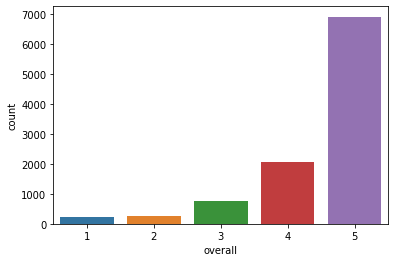

In [14]:
sns.countplot(data=df,x='overall')

In [15]:
import matplotlib.pyplot as plt

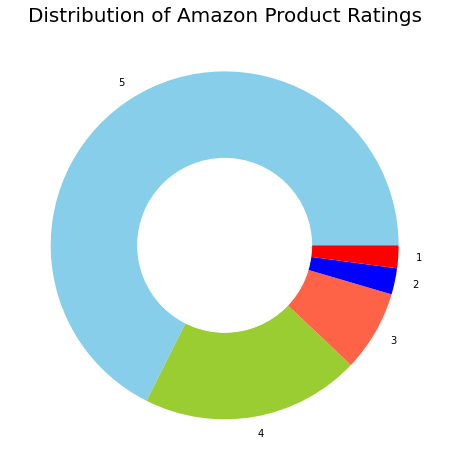

In [16]:
ratings = df["overall"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [17]:
condensed_df['overall'].unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [18]:
sentiments=SentimentIntensityAnalyzer()

In [19]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [20]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [21]:
from nltk.sentiment import vader

In [22]:
condensed_df12=condensed_df[:200]

In [23]:
condensed_df12

,overall,reviewText
0,5,"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"
1,5,"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]"
2,5,"The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it."
3,5,Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging.
4,5,This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing.
...,...,...
196,5,"Seriously? The Shure SM57 sets the standard, which by all other instrument microphones are judged.No kidding. They work great with guitar (for a REAL acoustic guitar sound, drums, congas, tablas... You name it.. if it's an instrument the SM57 delivers.I hear it's good for vocals as well. When the President gives a speech, the SM57 is there.In my experience a vocalist better have above average pipes to use the SM57. The SM58 is better suited to those who lack vocal projection (most wannabe's).For instrument sound reinforcement... bar-none... the best."
197,5,"If it's good enough to track Tom Petty's vox on the heartbreakers albums, its good enough for the rest of us. Sounds great on amps and perc. Dropped one from a 12 story building a few years back into a parking lot and it barley dented the housing and still works 100%. My drummer still uses it on his kit and I never told him haha (hope he doesn't read this review!) It's a shame the new mics coming out (wireless stuff they make: IE Presentor, PG seies, digital series etc) are such flimsy pieces of garbage. This is the last of the cool from Shure."
198,5,"There's a reason every mic cabinet has at least one of these (and if it doesn't, it should). This is a great all purpose dynamic mic, I use it for instruments, vocals, even field recording sometimes. The SM58 has a frequency response that is supposed to be more tailored towards vocals, but that doesn't mean that the 57 can't handle a voice. They're pretty much the same mic as far as I'm concerned, and for the average amateur recording engineer or home studio practitioner I think you'll find the same thing. And if you're operating at a level where you refuse to use them interchangeably, then you probably already know what you're looking for. I'll be getting a 58 to add to my personal cabinet soon, but if you're like me and wanted to spend more on a nice condenser before filling out your dynamic mics, you can't go wrong here."
199,4,I use this to mic snare drums and sometimes guitar cabinets. It works as well as most mics and is more durable than most. I have used this in the studio when nothing else was available and it worked fine. As long as I run sound for a living I will keep some of these mics.


In [24]:
def get_sentiment_score_oplex(text): 
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    raw_sentences = sent_tokenize(text)    
    for sentence in raw_sentences:
        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = WhitespaceTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))   
    return total_score


In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
condensed_df12['oplex_sentiment_score'] = condensed_df12['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

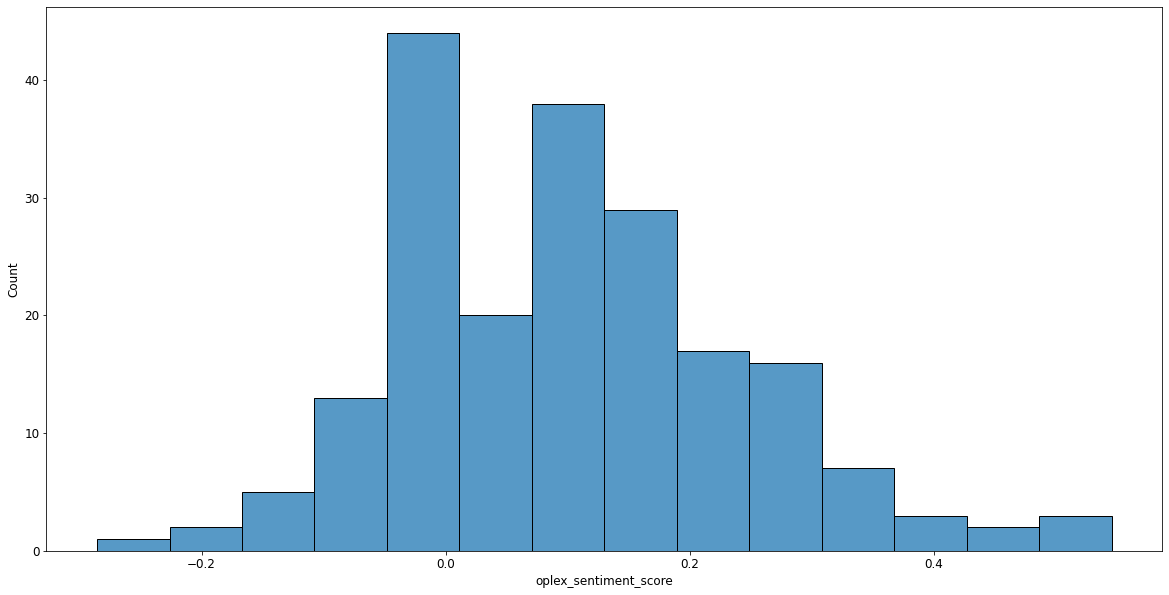

In [27]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=condensed_df12.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [28]:
condensed_df12['oplex_sentiment'] = \
    condensed_df12['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [29]:
condensed_df12.head(2)

,overall,reviewText,oplex_sentiment_score,oplex_sentiment
0,5,"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",0.156863,positive
1,5,"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",0.057692,neutral


In [30]:
condensed_df12['oplex_sentiment'].value_counts(dropna=False)

positive    88
neutral     87
negative    25
Name: oplex_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

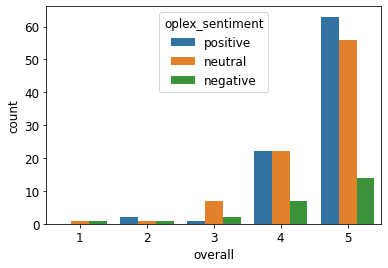

In [31]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = condensed_df12)

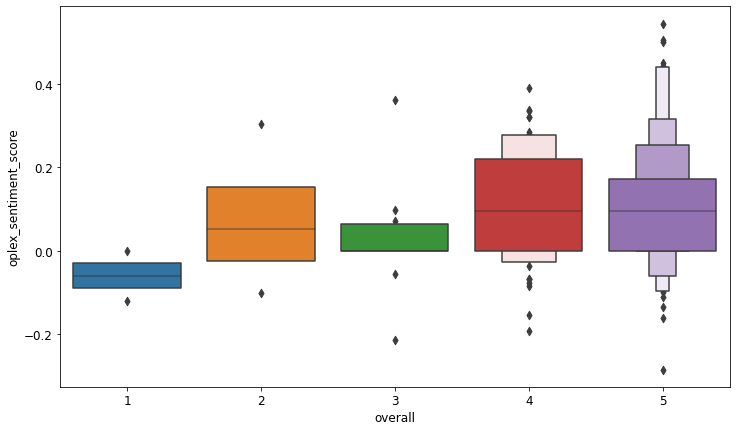

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = condensed_df12, ax=ax)
plt.show()

In [33]:
y_oplex_pred = condensed_df12['oplex_sentiment'].tolist()

In [34]:
pos_reviews = condensed_df12.loc[condensed_df12['overall'] > 3]
neg_reviews = condensed_df12.loc[condensed_df12['overall'] < 3]
neu_reviews = condensed_df12.loc[condensed_df12['overall'] == 3 ]

In [35]:
pos_reviews.insert(2, 'reaction', 'positive')
neg_reviews.insert(2, 'reaction', 'negative')
neu_reviews.insert(2, 'reaction', 'neutral')

In [36]:
condensed_df12=pd.concat([pos_reviews, neg_reviews,neu_reviews], ignore_index=True)

In [37]:
condensed_df12.head(3)

,overall,reviewText,reaction,oplex_sentiment_score,oplex_sentiment
0,5,"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",positive,0.156863,positive
1,5,"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",positive,0.057692,neutral
2,5,"The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it.",positive,0.103896,positive


In [38]:
y_true=condensed_df12['reaction']
y_pred=condensed_df12['oplex_sentiment']

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

opinion_lexicon_acc=accuracy_score(y_true,y_pred)
print(f"Accuracy for the opinion_lexicon is {opinion_lexicon_acc}")

Accuracy for the opinion_lexicon is 0.47


In [40]:
condensed_df12['oplex_sentiment'].value_counts(dropna=False)

positive    88
neutral     87
negative    25
Name: oplex_sentiment, dtype: int64

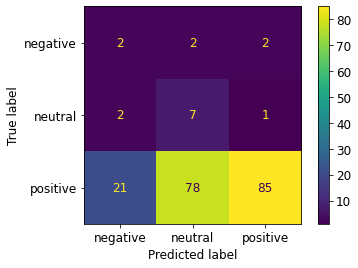

In [41]:
cm=confusion_matrix(y_true,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','neutral','positive'])
cmd.plot()

# Naive Bayes

In [42]:
pos_reviews = condensed_df.loc[condensed_df['overall'] > 3]

In [43]:
pos_reviews.head(3)

,overall,reviewText
0,5,"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"
1,5,"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]"
2,5,"The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it."


In [44]:
pos_reviews.shape

(8998, 2)

In [45]:
neg_reviews = condensed_df.loc[condensed_df['overall'] < 3]

In [46]:
neg_reviews.head(3)

,overall,reviewText
15,2,"I bought this to use with my keyboard. I wasn't really aware that there were other options for keyboard pedals. It doesn't work as smoothly as the pedals do on an acoustic piano, which is what I'd always used. Doesn't have the same feel either. Nowhere close.In my opinion, a sustain pedal like the M-Audio SP-2 Sustain Pedal with Piano Style Action or other similar pedal is a much better choice. The price difference is only a few dollars and the feel and action are so much better. The only thing I've found the Yamaha FC-5 Sustain Pedal is good for is taking up space in a drawer where I keep my electric guitar pedals."
50,2,"I didn't expect this cable to be so thin. It's easily 1/2 the thickness of any guitar cable I've used. Not sure about long-term durability or signal loss/interference. If I had the foresight I'd spend a couple extra bucks on a thicker cable. Still, it works and was inexpensive.EDIT: 6 months later and it's dead already. Wire frayed at the right angle jack. You get what you pay for."
52,1,"It hums, crackles, and I think I'm having problems with my equipment. As soon as I use any of my other cords then the problem is gone. Hosa makes some other products that have good value. But based on my experience I don't recommend this one."


In [47]:
neg_reviews.shape

(465, 2)

In [48]:
neu_reviews = condensed_df.loc[condensed_df['overall'] == 3]
neu_reviews.shape

(771, 2)

In [49]:
pos_reviews.insert(2, 'reaction', 'positive')

In [50]:
neg_reviews.insert(2, 'reaction', 'negative')

In [51]:
neu_reviews.insert(2, 'reaction', 'neutral')

In [52]:
pos_reviews.head(3)

,overall,reviewText,reaction
0,5,"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",positive
1,5,"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",positive
2,5,"The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it.",positive


In [53]:
pos_100=pos_reviews[:00]

In [54]:
neg_100=neg_reviews[:200]
neu_100=neu_reviews[:200]

In [55]:
top_100s=pd.concat([pos_100,neg_100,neu_100],ignore_index=True)

In [56]:
top_100s.to_csv("musical_insturments-1.csv")

In [57]:
d=pd.read_csv("musical_insturments-1.csv")
d.shape

(400, 4)

## Concatenate the pos and negative reviews here as we already got them

In [58]:
combined_reviews = pd.concat([pos_reviews, neg_reviews], ignore_index=True)

In [59]:
combined_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     9463 non-null   int64 
 1   reviewText  9463 non-null   object
 2   reaction    9463 non-null   object
dtypes: int64(1), object(2)
memory usage: 221.9+ KB


In [60]:
combined_reviews['reviewText'].isnull().sum()

#no null values

0

In [61]:
combined_reviews

,overall,reviewText,reaction
0,5,"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",positive
1,5,"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",positive
2,5,"The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it.",positive
3,5,Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging.,positive
4,5,This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing.,positive
...,...,...,...
9458,1,"I really wanted to like these, but they're a frickin, lint-catching sticky frickin' mess! They went from my wife's snare back into the holder in a New York Minute, have never seen the light of day, and may have been thrown in the garbage. Save your money. We use a heavy stoneware coaster with a cork back to quieten her snare now.",negative
9459,2,The larger ones sometimes have the neck snap so I thought this might be the answer. The answer is to treat your larger Snarks nicer cause this thing on the back of your guitar with no adjustments simple doesn't cut it. I have to move the guitar and crane my neck to see the display. I'm quite disappointed and it sits here with no use. It is cheap though. Still to me it was money out the window.,negative
9460,2,"The tension screw adjustment remains the best of any capo I've ever used - and I've tried many over the years. But what was Ned smoking when he decided to have the trigger handle and main support stem, including the pick clip and tuner holder, protude outward away from the fingerboard? It's awkward to apply and remove quickly. It's visually distracting for player and audience, and it doesn't add any mechanical benefit to the already excellent tension adjustment.The only possible justification I can come up with is having less to obstruct the fretting hand behind the neck - but even that doesn't fly. Regardless of capo tension you should position it as close to the fret as practical and, unless you're avoiding playing that first fret (or use a low-thumb classical fret hand position) you're always going to feel some part of the capo against the leading edge of your hand. I own the older Planet Waves tri-action capo and never felt that to be a problem.Otherwise the construction of the NS Artist Capo is superb. The surface is arched, probably between a 10-12 radius that works fine on various Strat fingerboards as well as a flatter SG/LP style. It doesn't work as well on the very flat 16 radius of my Martin OM-1 which is virtually the same as a classical. If I cranked the tension it's possible the rubber would flatten out but I wouldn't risk marring the neck wood.I tried both the pick and tuner clips and they're functional, but to be honest I wouldn't use either - too distrac

In [62]:
combined_reviews.to_csv('combined_reviews.csv')

In [63]:
print(combined_reviews.groupby('reaction').apply(lambda x:x.sample(n=116)))

               overall  \
reaction                 
negative 9255        1   
         9370        2   
         8999        2   
         9152        2   
         9432        2   
...                ...   
positive 3657        5   
         3440        5   
         1543        5   
         5347        5   
         2268        5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [64]:
sample_df = combined_reviews.groupby('reaction').apply(lambda x: x.sample(n=116)).reset_index(drop = True)

In [65]:
sample_df['reaction'].value_counts()

negative    116
positive    116
Name: reaction, dtype: int64

In [66]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     232 non-null    int64 
 1   reviewText  232 non-null    object
 2   reaction    232 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.6+ KB


In [67]:
sample_df

,overall,reviewText,reaction
0,2,"Soooo bummed. I simply love the sound on these cans, but the speakers are just too dang close to the surface (not deep enough in the cups) and press down hard on my ears. The max time I can wear them is like an hour, and then I can't wear them for a day or so due to residual pain. I guess if they used thicker pads to deepen the cups, that might help. Also, on most of my other phones, the speaker areas have fairly flat surfaces, while this one has the speakers jutting out of the cups and are covered by just one thin nylon sheet. So it's kind of like double trouble. However, these really do have great sound (especially the tight bass clarity). If it weren't for the discomfort factor, I would be using them all the time. As of now, I hardly use them at all. In fact, when I first tested these out, I was ready to hop on the computer and order a couple more. But I'm glad I waited to really give them a more prolonged test. Of course, we are all of varying shapes and sizes, ha ha, so they might work for you where they don't for me. If so, you've got a bargain on some great cans. If not, ouch. Cheers!",negative
1,2,"It is inexpensive but is difficult to use anywhere with other noise..I used it for several years but it is only a backup now.. Nice part is that you can calibrate the tuning, although probably would not be used by most musicians.. Other than that I think money would be better spent on a headstock type tuner.. I would not recommend it.",negative
2,2,"I thought it would protect my desk but the pad is almost like that rubber they put under rugs so they won't slip around. maybe i should get that for cheaper.I accidently bought LARGE, ooh boy is it; like, windshield sun reflector size. Sort of just a personal opinion review i suppose.",negative
3,2,"With drum pads, I basically either get 0 velocity, or max. And I have to really hammer on them to trigger. Hurts after a while.Likes:+ Size+ Assignable knobs.+ Works good w/ Ableton LiveDislikes:- Drum pads!Keys are pretty cheesy but workable and expected for this price and size.I'm looking to upgrade after a month.. Want better drum pads. :-/",negative
4,2,Tuner works great. Both by vibration and mic.Only real problem is the fact that the joint between the tuner and the clip is really weak. Mine broke off... not even a year old.,negative
...,...,...,...
227,5,"but works well, I have a different brand which has a string and small hook but I find when adjusted correctly I cannot remove it,, this sling keeps the head loop large so you can get it off without a binch of hassle,, I find the hook to be wide though and could be alot better with a thinner hook.",positive
228,5,I bought this for my mandolin and was pleasantly surprised how awesome it a find this was. Easy to use and handy for ANY string instruments.Only thing i regret is not getting one sooner.,positive
229,5,"It's hard to find a good clip-on tuner that's accurate and visible in all situations. The Snark SN-8(B) is my favorite so far. It's really bright, more accurate that other Snarks, and (despite other reviews saying it breaks easily) I've found it to be sturdy enough considering how flexible it is. Again, it's a clip-on tuner so don't expect razor-sharp accuracy. But it does a good enough job for what it is. It's quick and convenient. If you need something more accurate I recommend investing in a good pedal. I've found the swivel to be a nice feature that makes it easy to see the display. I don't typically use the metronome feature, but it's nice to have it. Overall, my favorite Snark model and my favorite clip-on tuner.",positive
230,5,"These strings are great for all sorts of playing styles. I bought a set of 9's and 10's and I also have some D'Addario 11's. The 9's are super slinky just like the name says. They're great for quick movement around the fret board. My only complaint is that they are at times too thin sounding. I play a lot of rock, and sometimes these just don't pack a punc

In [68]:
for i in sample_df:
    print(i)

overall
reviewText
reaction


In [69]:
pos_df = sample_df.loc[sample_df['reaction'] == 'positive']
pos_list = pos_df['reviewText'].tolist()

neg_df = sample_df.loc[sample_df['reaction'] == 'negative']
neg_list = neg_df['reviewText'].tolist()

In [70]:
pos_list[:10]

['This is your basic, black electric guitar cable but it works great.  So far the connections at both ends are solid and the sound from the amp is great!  Nice and rubbery and 10 feet is long enough.  If problems arise later with this cable, I will update this review, but as of now there has been no problems whatsoever with this cable.',
 'I use this music stand for my acoustic bass and electric bass these instruments are quite large and it secures the very well and they are very easily accessed  . I also use it for my acoustic tenor guitar which is on the other end of the scale in size and it works beautifully for it, Breaks down to a reasonable size for transport.',
 'I used this for a while, but now I have the behringer 8ch rack mount and this rarely gets used. Also, every single bass guitar amplifier that has been on stage when I was the soundman had a balanced direct output right with xlr connector right there on the amp. I still use this for practice at home.',
 "I've been swappi

In [71]:
#converting the each character into lower case

In [72]:
pos_list_lowered = [word.lower() for word in pos_list]
neg_list_lowered = [word.lower() for word in neg_list]

In [73]:
pos_list_lowered[:1]

['this is your basic, black electric guitar cable but it works great.  so far the connections at both ends are solid and the sound from the amp is great!  nice and rubbery and 10 feet is long enough.  if problems arise later with this cable, i will update this review, but as of now there has been no problems whatsoever with this cable.']

In [74]:
#We are now joining the entire positive sentences and -ve sents into 2 seperates

In [75]:
# using list comprehension 
pos_list_to_string = ' '.join([str(elem) for elem in pos_list_lowered]) 
neg_list_to_string = ' '.join([str(elem) for elem in neg_list_lowered])

In [76]:
pos_list_to_string

'this is your basic, black electric guitar cable but it works great.  so far the connections at both ends are solid and the sound from the amp is great!  nice and rubbery and 10 feet is long enough.  if problems arise later with this cable, i will update this review, but as of now there has been no problems whatsoever with this cable. i use this music stand for my acoustic bass and electric bass these instruments are quite large and it secures the very well and they are very easily accessed  . i also use it for my acoustic tenor guitar which is on the other end of the scale in size and it works beautifully for it, breaks down to a reasonable size for transport. i used this for a while, but now i have the behringer 8ch rack mount and this rarely gets used. also, every single bass guitar amplifier that has been on stage when i was the soundman had a balanced direct output right with xlr connector right there on the amp. i still use this for practice at home. i\'ve been swapping back and 

In [77]:
#from nltk.tokenize import WhitespaceTokenizer
#from nltk.corpus import stopwords


# Naive Bayes

In [78]:
stop = set(stopwords.words('english') + list(string.punctuation))

In [79]:
tokenizer = WhitespaceTokenizer()

In [80]:
filtered_pos_list = [w for w in tokenizer.tokenize(pos_list_to_string) if w not in stop]
filtered_neg_list = [w for w in tokenizer.tokenize(neg_list_to_string) if w not in stop]

In [81]:
filtered_pos_list[:30]

['basic,',
 'black',
 'electric',
 'guitar',
 'cable',
 'works',
 'great.',
 'far',
 'connections',
 'ends',
 'solid',
 'sound',
 'amp',
 'great!',
 'nice',
 'rubbery',
 '10',
 'feet',
 'long',
 'enough.',
 'problems',
 'arise',
 'later',
 'cable,',
 'update',
 'review,',
 'problems',
 'whatsoever',
 'cable.',
 'use']

In [82]:
filtered_pos_list2 = [w.strip(string.punctuation) for w in filtered_pos_list]

In [83]:
filtered_pos_list2[:30]

['basic',
 'black',
 'electric',
 'guitar',
 'cable',
 'works',
 'great',
 'far',
 'connections',
 'ends',
 'solid',
 'sound',
 'amp',
 'great',
 'nice',
 'rubbery',
 '10',
 'feet',
 'long',
 'enough',
 'problems',
 'arise',
 'later',
 'cable',
 'update',
 'review',
 'problems',
 'whatsoever',
 'cable',
 'use']

In [84]:
filtered_neg_list2 = [w.strip(string.punctuation) for w in filtered_neg_list]

In [85]:
fd_pos = nltk.FreqDist(filtered_pos_list2)
fd_neg = nltk.FreqDist(filtered_neg_list2)

In [86]:
fd_pos

FreqDist({'guitar': 70, 'great': 53, 'strings': 41, 'one': 39, 'good': 38, 'use': 36, 'well': 35, 'it': 35, 'like': 35, 'sound': 32, ...})

In [87]:
fd_pos.most_common(15)

[('guitar', 70),
 ('great', 53),
 ('strings', 41),
 ('one', 39),
 ('good', 38),
 ('use', 36),
 ('well', 35),
 ('it', 35),
 ('like', 35),
 ('sound', 32),
 ('really', 31),
 ('would', 22),
 ('works', 21),
 ('easy', 21),
 ('price', 21)]

In [88]:
fd_neg.most_common(10)

[('guitar', 69),
 ('one', 60),
 ('sound', 56),
 ('like', 52),
 ('get', 50),
 ('it', 43),
 ('great', 42),
 ('use', 39),
 ('pedal', 39),
 ('amp', 38)]

In [89]:
def word_features(words):
    return dict([(word, True) for word in words.split()])

In [90]:
#the filtered pos list 2 is a list of values where it contains only the text
#with no stop words and no punctuations

In [91]:
positive_features = [(word_features(f), 'pos') for f in filtered_pos_list2]
negative_features = [(word_features(f), 'neg') for f in filtered_neg_list2]
labeledwords = positive_features + negative_features

In [92]:
print(negative_features[10])

({'not': True}, 'neg')


In [93]:
type(negative_features)

list

In [94]:
len(positive_features)

4230

In [95]:
len(negative_features)

6792

In [96]:
labeledwords

[({'basic': True}, 'pos'),
 ({'black': True}, 'pos'),
 ({'electric': True}, 'pos'),
 ({'guitar': True}, 'pos'),
 ({'cable': True}, 'pos'),
 ({'works': True}, 'pos'),
 ({'great': True}, 'pos'),
 ({'far': True}, 'pos'),
 ({'connections': True}, 'pos'),
 ({'ends': True}, 'pos'),
 ({'solid': True}, 'pos'),
 ({'sound': True}, 'pos'),
 ({'amp': True}, 'pos'),
 ({'great': True}, 'pos'),
 ({'nice': True}, 'pos'),
 ({'rubbery': True}, 'pos'),
 ({'10': True}, 'pos'),
 ({'feet': True}, 'pos'),
 ({'long': True}, 'pos'),
 ({'enough': True}, 'pos'),
 ({'problems': True}, 'pos'),
 ({'arise': True}, 'pos'),
 ({'later': True}, 'pos'),
 ({'cable': True}, 'pos'),
 ({'update': True}, 'pos'),
 ({'review': True}, 'pos'),
 ({'problems': True}, 'pos'),
 ({'whatsoever': True}, 'pos'),
 ({'cable': True}, 'pos'),
 ({'use': True}, 'pos'),
 ({'music': True}, 'pos'),
 ({'stand': True}, 'pos'),
 ({'acoustic': True}, 'pos'),
 ({'bass': True}, 'pos'),
 ({'electric': True}, 'pos'),
 ({'bass': True}, 'pos'),
 ({'instrum

In [97]:
random.shuffle(labeledwords)

In [98]:
len(labeledwords)

11022

In [99]:
train_set, test_set = labeledwords[2000:], labeledwords[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [100]:
print(classifier.classify(word_features('This is the best guitar i have ever found on online')))

pos


In [101]:
print(classifier.classify(word_features("It doesn't suits with black coating, it is even hard to play music on it")))

neg


In [102]:
naive_acc=nltk.classify.accuracy(classifier, test_set)
naive_acc

0.62

In [103]:
print(f"Accuracy score of naive bayes classifier {nltk.classify.accuracy(classifier, test_set)}")


Accuracy score of naive bayes classifier 0.62


In [104]:
classifier.show_most_informative_features(7)

Most Informative Features
                   cheap = True              neg : pos    =      8.1 : 1.0
              distortion = True              neg : pos    =      8.1 : 1.0
                       5 = True              pos : neg    =      6.9 : 1.0
                    wall = True              pos : neg    =      6.9 : 1.0
                      9v = True              pos : neg    =      5.9 : 1.0
               headstock = True              pos : neg    =      5.9 : 1.0
                    pack = True              pos : neg    =      5.9 : 1.0


# Conclusions

In [105]:
y=[opinion_lexicon_acc,naive_acc]
x=['opinion_lexicon','naive_bayes']
color=['red','green']

<BarContainer object of 2 artists>

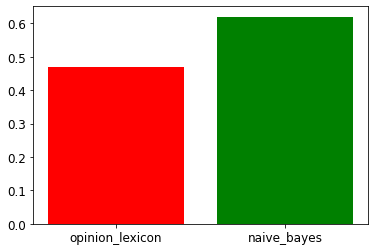

In [106]:
plt.bar(x=x,height=y,color=color)